In [1]:
# Imports
import os
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

# Loading the data
# Load text files with categories as subfolder names.
raw_data = load_files(r'E:/training_lib_KTH', shuffle=False)
files = raw_data['filenames']
targets = raw_data['target']
# Randomly dividing the whole data into training (66.67%) and testing (33.33%) data 
train_files, test_files, train_targets, test_targets = train_test_split(files, targets, test_size=1/3, random_state=191)

# Taking ~25% of the training data for validation
valid_files = train_files[150:]
valid_targets = train_targets[150:]

# Remaining data will be used for training the model
train_files = train_files[:150]
train_targets = train_targets[:150]

# Generic details about the data

print('Total number of videos:', len(files))
print('\nNumber of videos in training data:', train_files.shape[0])
print('Number of videos in validation data:', valid_files.shape[0])
print('Number of videos in test data:', test_files.shape[0])

Total number of videos: 300

Number of videos in training data: 150
Number of videos in validation data: 50
Number of videos in test data: 100


In [2]:
print(files)
print(targets)
print(raw_data['target_names'])

['E:/training_lib_KTH\\boxing\\person03_boxing_d3_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person03_boxing_d4_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person04_boxing_d1_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person04_boxing_d2_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person04_boxing_d3_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person04_boxing_d4_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person05_boxing_d1_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person05_boxing_d2_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person05_boxing_d3_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person05_boxing_d4_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person06_boxing_d1_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person06_boxing_d2_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person06_boxing_d3_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person06_boxing_d4_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person07_boxing_d1_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person07_boxing_d2_uncomp.avi'
 'E:/tra

In [3]:
# Displaying the first 5 videos (paths) in the training data along with their labels
# (path of video, class label)
for pair in zip(train_files[:5], train_targets[:5]):
    print(pair)

('E:/training_lib_KTH_test\\jogging\\person12_jogging_d1_uncomp.avi', 3)
('E:/training_lib_KTH_test\\running\\person17_running_d4_uncomp.avi', 4)
('E:/training_lib_KTH_test\\jogging\\person14_jogging_d1_uncomp.avi', 3)
('E:/training_lib_KTH_test\\walking\\person16_walking_d4_uncomp.avi', 5)
('E:/training_lib_KTH_test\\handwaving\\person06_handwaving_d3_uncomp.avi', 2)

























  0%|                                                                                            | 0/1 [00:00<?, ?it/s]






















100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.50it/s]

























Shape of the sample data: (1, 660, 120, 160, 3)


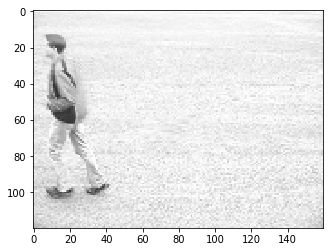

In [33]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import skvideo
# skvideo.setFFmpegPath("C:/Users/94009/Anaconda3/envs/tensorflow/Lib/site-packages/ffmpeg")


# import skvideo.io

from utils import Videos
%matplotlib inline

# The path of a sample video in the training data
sample_files = train_files[:1]

# An object of the class 'Videos'
reader = Videos(target_size=None, 
                to_gray=False)

# Loading the sample videos, in their original format
sample = reader.read_videos(sample_files)
print('\nShape of the sample data:', sample.shape)

# Displaying a frame from the sample video
plt.imshow(sample[0][300])


In [5]:
# Imports
import numpy as np
from keras.utils import to_categorical
from utils import Videos

# An object of the class `Videos` to load the data in the required format
reader = Videos(target_size=(32, 32), 
                to_gray=True, 
                max_frames=200, 
                extract_frames='middle', 
                normalize_pixels=(0, 1))

In [6]:
# Reading training videos and one-hot encoding the training labels
X_train = reader.read_videos(train_files)
y_train = to_categorical(train_targets, num_classes=6)
print('Shape of training data:', X_train.shape)
print('Shape of training labels:', y_train.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [01:36<00:00,  1.55it/s]


Shape of training data: (150, 200, 32, 32, 1)
Shape of training labels: (150, 6)


In [7]:
# Reading validation videos and one-hot encoding the validation labels
X_valid = reader.read_videos(valid_files)
y_valid = to_categorical(valid_targets, num_classes=6)
print('Shape of validation data:', X_valid.shape)
print('Shape of validation labels:', y_valid.shape)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:31<00:00,  1.47it/s]


Shape of validation data: (50, 200, 32, 32, 1)
Shape of validation labels: (50, 6)


In [8]:
# Reading testing videos and one-hot encoding the testing labels
X_test = reader.read_videos(test_files)
y_test = to_categorical(test_targets, num_classes=6)
print('Shape of testing data:', X_test.shape)
print('Shape of testing labels:', y_test.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:02<00:00,  1.43it/s]


Shape of testing data: (100, 200, 32, 32, 1)
Shape of testing labels: (100, 6)


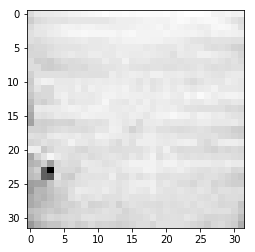

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# After pre-processing

# Displaying the first frame of the first processed video from the training data
plt.imshow(np.squeeze(X_train[0][0], axis=2), cmap='gray')

In [ ]:
# Model-V1

from tensorflow.python.framework import ops
ops.reset_default_graph()

from keras import backend as K
K.clear_session()

from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, Flatten
from keras.layers.core import Dense, Dropout

# from keras import backend as K
# K.set_image_dim_ordering('tf')

from keras.utils import plot_model


# Using the Sequential Model
model = Sequential()

# Adding Alternate convolutional and pooling layers
model.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(5, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))

model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='valid', activation='relu'))
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model.add(Conv3D(filters=256, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))


model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 256
# 这个操作就是它的字面意思：把特征图全局平均一下输出一个值，也就是把W*H*D的一个张量变成1*1*D的张量
# https://blog.csdn.net/leviopku/article/details/82805368

# model.add(GlobalAveragePooling3D())
model.add(Flatten())
# Hidden layer
model.add(Dense(32, activation='relu'))

# Dropout Layer
model.add(Dropout(0.5))

# Output layer
model.add(Dense(6, activation='softmax'))

model.summary()

plot_model(model, to_file="F://C3D_Plot.png", show_shapes=True, show_layer_names=True)

In [25]:
# Model
# 改变卷积核实验

from tensorflow.python.framework import ops
ops.reset_default_graph()

from keras import backend as K
K.clear_session()

from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, Flatten, BatchNormalization
from keras.layers.core import Dense, Dropout

# from keras import backend as K
# K.set_image_dim_ordering('tf')

from keras.utils import plot_model


# Using the Sequential Model
model = Sequential()

# Adding Alternate convolutional and pooling layers
model.add(Conv3D(filters=16, kernel_size=(3, 3, 3), strides=(3, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
# model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model.add(Conv3D(filters=64, kernel_size=(3, 3, 3), strides=(3, 1, 1), padding='valid', activation='relu'))
# model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
# model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 256
# 这个操作就是它的字面意思：把特征图全局平均一下输出一个值，也就是把W*H*D的一个张量变成1*1*D的张量
# https://blog.csdn.net/leviopku/article/details/82805368

model.add(GlobalAveragePooling3D())
# model.add(Flatten())
# Hidden layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

# Dropout Layer
model.add(Dropout(0.5))

# Output layer
model.add(Dense(6, activation='softmax'))

model.summary()

# plot_model(model, to_file="F://C3D_Cov3x3_BN_Plot.png", show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 67, 32, 32, 16)    448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 67, 32, 32, 16)    64        
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 67, 16, 16, 16)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 22, 14, 14, 64)    27712     
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 14, 14, 64)    256       
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 22, 7, 7, 64)      0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 8, 7, 7, 256)      442624    
__________

In [26]:
# Training Model-Flatten
from keras.callbacks import ModelCheckpoint

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# import keras
# # initiate RMSprop optimizer
# opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

# # Let's train the model using RMSprop
# model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint = ModelCheckpoint(filepath='E://Model_Weights//Model_weights_Cov3x3_Final_GlobalAvg.best.hdf5', save_best_only=True, verbose=1)

# print(X_train.shape[1:])
# print(X_valid.shape[1:])
# print(y_valid.shape[1:])
# Training the model for 40 epochs
history = model.fit(X_train, y_train, batch_size=16, epochs=40, verbose=2,
                    validation_data=(X_valid, y_valid),  callbacks=[checkpoint])

Train on 150 samples, validate on 50 samples
Epoch 1/40
 - 4s - loss: 2.3770 - acc: 0.2067 - val_loss: 3.4640 - val_acc: 0.1800

Epoch 00001: val_loss improved from inf to 3.46400, saving model to E://Model_Weights//Model_weights_Cov3x3_Final_GlobalAvg.best.hdf5
Epoch 2/40
 - 2s - loss: 1.8279 - acc: 0.3333 - val_loss: 3.7720 - val_acc: 0.1800

Epoch 00002: val_loss did not improve from 3.46400
Epoch 3/40
 - 2s - loss: 1.5978 - acc: 0.3667 - val_loss: 3.0571 - val_acc: 0.2600

Epoch 00003: val_loss improved from 3.46400 to 3.05705, saving model to E://Model_Weights//Model_weights_Cov3x3_Final_GlobalAvg.best.hdf5
Epoch 4/40
 - 2s - loss: 1.5338 - acc: 0.4400 - val_loss: 4.0102 - val_acc: 0.2400

Epoch 00004: val_loss did not improve from 3.05705
Epoch 5/40
 - 2s - loss: 1.4126 - acc: 0.5267 - val_loss: 5.1401 - val_acc: 0.1800

Epoch 00005: val_loss did not improve from 3.05705
Epoch 6/40
 - 2s - loss: 1.2871 - acc: 0.5333 - val_loss: 5.0587 - val_acc: 0.2200

Epoch 00006: val_loss did 

In [27]:
# Evaluating Model
# Loading the model that performed the best on the validation set
model.load_weights('E://Model_Weights//Model_weights_Cov3x3_Final_GlobalAvg.best.hdf5')

# Testing the model on the Test data
(loss, accuracy) = model.evaluate(X_test, y_test, batch_size=16, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy * 100))

Accuracy on test data: 42.00%


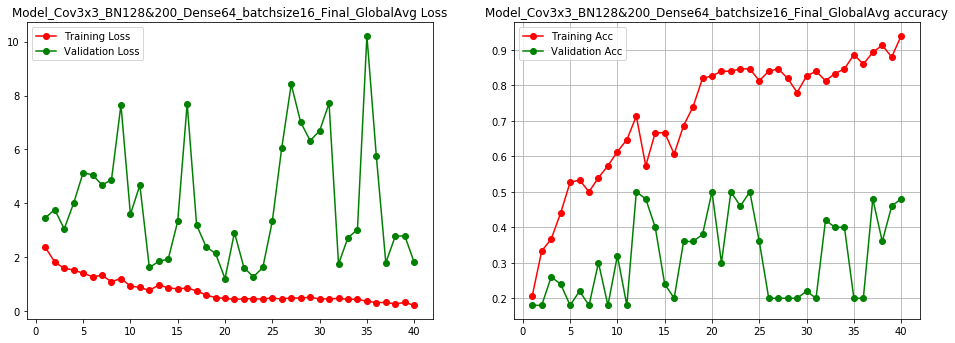

In [28]:
# Learning Curve
# Making the plot larger
plt.figure(figsize=(16, 12))
plt.subplot(2,2,1)
# # plt.figure(figsize=(12, 8))
loss = history.history['loss']                          # Loss on the training data
val_loss = history.history['val_loss']                  # Loss on the validation data
epochs = range(1, 41)
plt.title('Model_Cov3x3_BN128&200_Dense64_batchsize16_Final_GlobalAvg Loss')
plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'go-', label = 'Validation Loss')
plt.legend()

plt.subplot(2,2,2)
# plt.figure(figsize=(12, 8))

loss = history.history['acc']                          # acc on the training data
val_loss = history.history['val_acc']                  # acc on the validation data
epochs = range(1, 41)

plt.title('Model_Cov3x3_BN128&200_Dense64_batchsize16_Final_GlobalAvg accuracy')
plt.plot(epochs, loss, 'ro-', label='Training Acc')
plt.plot(epochs, val_loss, 'go-', label = 'Validation Acc')
plt.grid()
plt.legend()
plt.savefig('F://model_accuracy&loss_Cov3x3_BN128&200_Dense64_batchsize16_Final_GlobalAvg.png')
# plt.close()

In [5]:
# Model-V2-Normal
from tensorflow.python.framework import ops
ops.reset_default_graph()

from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, Flatten
from keras.layers.core import Dense, Dropout

# from keras import backend as K
# K.set_image_dim_ordering('tf')

from keras.utils import plot_model

model = Sequential()

# Define model
model = Sequential()

model.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(5, 1, 1), padding='same', activation='relu', 
                 input_shape=(50, 128, 128, 1)))
model.add(Conv3D(filters=32, kernel_size=(10, 3, 3), strides=(5, 1, 1), padding='same', activation='relu'))
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv3D(filters=64, kernel_size=(10, 3, 3), strides=(5, 1, 1), padding='same', activation='relu'))
model.add(Conv3D(filters=64, kernel_size=(10, 3, 3), strides=(5, 1, 1), padding='same', activation='relu'))
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv3D(filters=256, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))

model.add(GlobalAveragePooling3D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.summary()
# model.add(Conv3D(32, kernel_size=(3, 3, 3), input_shape=(50, 128, 128, 1), border_mode='same'))
# model.add(Activation('relu'))
# model.add(Conv3D(32, kernel_size=(3, 3, 3), border_mode='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling3D(pool_size=(3, 3, 3), border_mode='same'))
# model.add(Dropout(0.25))

# model.add(Conv3D(64, kernel_size=(3, 3, 3), border_mode='same'))
# model.add(Activation('relu'))
# model.add(Conv3D(64, kernel_size=(3, 3, 3), border_mode='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling3D(pool_size=(3, 3, 3), border_mode='same'))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(nb_classes=6, activation='softmax'))

# model.compile(loss=categorical_crossentropy,
#               optimizer=Adam(), metrics=['accuracy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 10, 128, 128, 16)  1456      
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 2, 128, 128, 32)   46112     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 2, 64, 64, 32)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 64, 64, 32)     0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 1, 64, 64, 64)     184384    
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 1, 64, 64, 64)     368704    
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 1, 32, 32, 64)     0         
__________

In [2]:
# Training Model-V2
from keras.callbacks import ModelCheckpoint

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint = ModelCheckpoint(filepath='E://Model_Weights//Model_weights_Flatten.best.hdf5', save_best_only=True, verbose=1)

# print(X_train.shape[1:])
# print(X_valid.shape[1:])
# print(y_valid.shape[1:])
# Training the model for 40 epochs
history = model.fit(X_train, y_train, batch_size=8, epochs=5, verbose=2,
                    validation_data=(X_valid, y_valid),  callbacks=[checkpoint])

NameError: name 'X_train' is not defined

In [31]:
# Evaluating Model
# Loading the model that performed the best on the validation set
model.load_weights('E://Model_Weights//Model_weights_V2.best.hdf5')

# Testing the model on the Test data
(loss, accuracy) = model.evaluate(X_test, y_test, batch_size=8, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy * 100))

Accuracy on test data: 15.00%


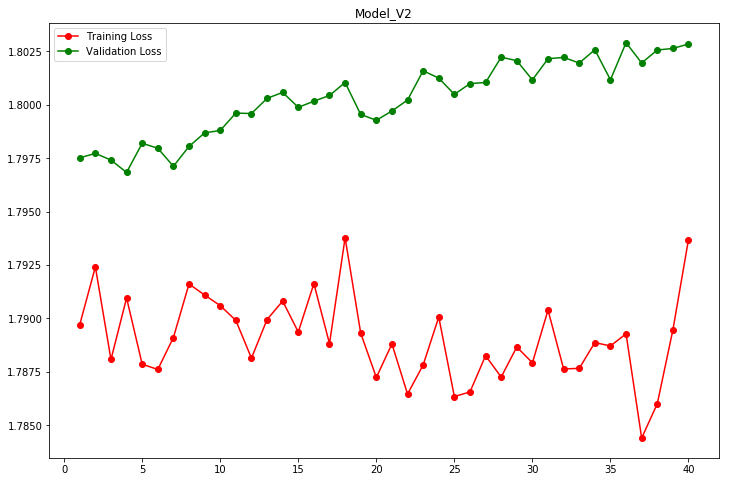

In [32]:
# Learning Curve
# Making the plot larger
plt.figure(figsize=(12, 8))

loss = history.history['loss']                          # Loss on the training data
val_loss = history.history['val_loss']                  # Loss on the validation data
epochs = range(1, 41)
plt.title('Model_V2')
plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'go-', label = 'Validation Loss')
plt.legend()

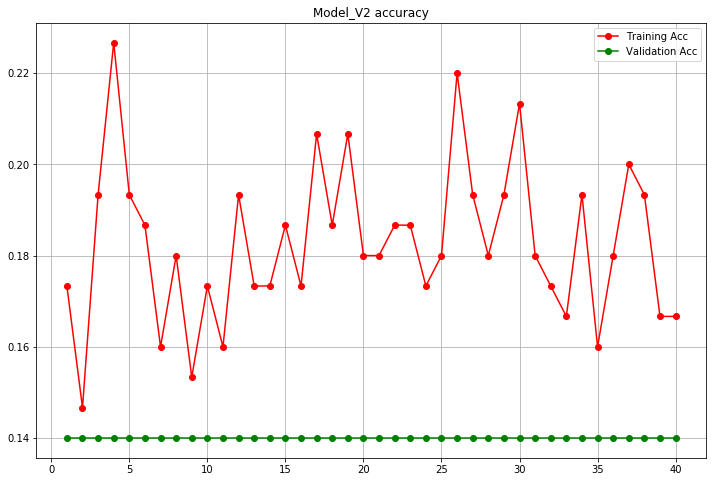

In [33]:
plt.figure(figsize=(12, 8))

loss = history.history['acc']                          # acc on the training data
val_loss = history.history['val_acc']                  # acc on the validation data
epochs = range(1, 41)

plt.title('Model_V2 accuracy')
plt.plot(epochs, loss, 'ro-', label='Training Acc')
plt.plot(epochs, val_loss, 'go-', label = 'Validation Acc')
plt.grid()
plt.legend()
# plt.savefig('F://model_accuracy.png')
# plt.close()

In [14]:
# C3D-Paper
# https://github.com/axon-research/c3d-keras/blob/master/c3d_model.py

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D, ZeroPadding3D
from keras.optimizers import SGD

model = Sequential()

# input_shape=(16, 128, 128, 3) # l, h, w, c

model.add(Convolution3D(64, 3, 3, 3, activation='relu',
                            padding='same', name='conv1',
                            input_shape=X_train.shape[1:]))
model.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2),
                       padding='valid', name='pool1'))
# 2nd layer group
model.add(Convolution3D(128, 3, 3, 3, activation='relu',
                        padding='same', name='conv2'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2),
                       padding='valid', name='pool2'))
# 3rd layer group
model.add(Convolution3D(256, 3, 3, 3, activation='relu',
                        padding='same', name='conv3a'))
# model.add(Convolution3D(256, 3, 3, 3, activation='relu',
#                         padding='same', name='conv3b'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2),
                       padding='valid', name='pool3'))
# 4th layer group
model.add(Convolution3D(512, 3, 3, 3, activation='relu',
                        padding='same', name='conv4a'))
# model.add(Convolution3D(512, 3, 3, 3, activation='relu',
#                         padding='same', name='conv4b'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2),
                       padding='valid', name='pool4'))
# 5th layer group
# model.add(Convolution3D(512, 3, 3, 3, activation='relu',
#                         padding='same', name='conv5a'))
# model.add(Convolution3D(512, 3, 3, 3, activation='relu',
#                         padding='same', name='conv5b'))
model.add(ZeroPadding3D(padding=((0, 0), (0, 1), (0, 1)), name='zeropad5'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2),
                       padding='valid', name='pool5'))
model.add(Flatten())
# model.add(GlobalAveragePooling3D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# FC layers group
# model.add(Dense(4096, activation='relu', name='fc6'))
# model.add(Dropout(.5))
# model.add(Dense(4096, activation='relu', name='fc7'))
# model.add(Dropout(.5))
# model.add(Dense(487, activation='softmax', name='fc8'))

model.summary()

C:\Users\94009\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:15: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(64, (3, 3, 3), input_shape=(50, 128, ..., activation="relu", name="conv1", padding="same")`
C:\Users\94009\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:20: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(128, (3, 3, 3), activation="relu", name="conv2", padding="same")`
C:\Users\94009\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:25: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(256, (3, 3, 3), activation="relu", name="conv3a", padding="same")`
C:\Users\94009\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:32: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(512, (3, 3, 3), activation="relu", name="conv4a", padding="same")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv3D)               (None, 50, 128, 128, 64)  1792      
_________________________________________________________________
pool1 (MaxPooling3D)         (None, 50, 64, 64, 64)    0         
_________________________________________________________________
conv2 (Conv3D)               (None, 50, 64, 64, 128)   221312    
_________________________________________________________________
pool2 (MaxPooling3D)         (None, 25, 32, 32, 128)   0         
_________________________________________________________________
conv3a (Conv3D)              (None, 25, 32, 32, 256)   884992    
_________________________________________________________________
pool3 (MaxPooling3D)         (None, 12, 16, 16, 256)   0         
_________________________________________________________________
conv4a (Conv3D)              (None, 12, 16, 16, 512)   3539456   
__________

In [48]:
# Training Model-C3D
from keras.callbacks import ModelCheckpoint

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint = ModelCheckpoint(filepath='E://Model_Weights//Model_weights_C3D.best.hdf5', save_best_only=True, verbose=1)

print(X_train.shape[1:])
print(X_valid.shape[1:])
print(y_valid.shape[1:])
# Training the model for 40 epochs
history = model.fit(X_train, y_train, batch_size=8, epochs=10, verbose=2,
                    validation_data=(X_valid, y_valid),  callbacks=[checkpoint])

(50, 128, 128, 1)
(50, 128, 128, 1)
(6,)
Train on 150 samples, validate on 50 samples
Epoch 1/10


NotFoundError: FeedInputs: unable to find feed output conv1_input_3:0

In [68]:
# Training Model-V1
from keras.callbacks import ModelCheckpoint

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint = ModelCheckpoint(filepath='E://Model_Weights//Model_weights.best.hdf5', save_best_only=True, verbose=1)

# print(X_train.shape[1:])
# print(X_valid.shape[1:])
# print(y_valid.shape[1:])
# Training the model for 40 epochs
history = model.fit(X_train, y_train, batch_size=8, epochs=40, verbose=2,
                    validation_data=(X_valid, y_valid),  callbacks=[checkpoint])

Train on 150 samples, validate on 50 samples
Epoch 1/40
 - 7s - loss: 1.7938 - acc: 0.1400 - val_loss: 1.7881 - val_acc: 0.2200

Epoch 00001: val_loss improved from inf to 1.78813, saving model to E://Model_Weights//Model_weights.best.hdf5
Epoch 2/40
 - 4s - loss: 1.7913 - acc: 0.1933 - val_loss: 1.7816 - val_acc: 0.2000

Epoch 00002: val_loss improved from 1.78813 to 1.78155, saving model to E://Model_Weights//Model_weights.best.hdf5
Epoch 3/40
 - 4s - loss: 1.7942 - acc: 0.1867 - val_loss: 1.7855 - val_acc: 0.2400

Epoch 00003: val_loss did not improve from 1.78155
Epoch 4/40
 - 4s - loss: 1.7632 - acc: 0.2533 - val_loss: 1.7883 - val_acc: 0.2000

Epoch 00004: val_loss did not improve from 1.78155
Epoch 5/40
 - 4s - loss: 1.7898 - acc: 0.1733 - val_loss: 1.7542 - val_acc: 0.1800

Epoch 00005: val_loss improved from 1.78155 to 1.75421, saving model to E://Model_Weights//Model_weights.best.hdf5
Epoch 6/40
 - 4s - loss: 1.7133 - acc: 0.2733 - val_loss: 1.6416 - val_acc: 0.3400

Epoch 00

In [69]:
# Evaluating Model
# Loading the model that performed the best on the validation set
model.load_weights('E://Model_Weights//Model_weights.best.hdf5')

# Testing the model on the Test data
(loss, accuracy) = model.evaluate(X_test, y_test, batch_size=8, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy * 100))

Accuracy on test data: 29.00%


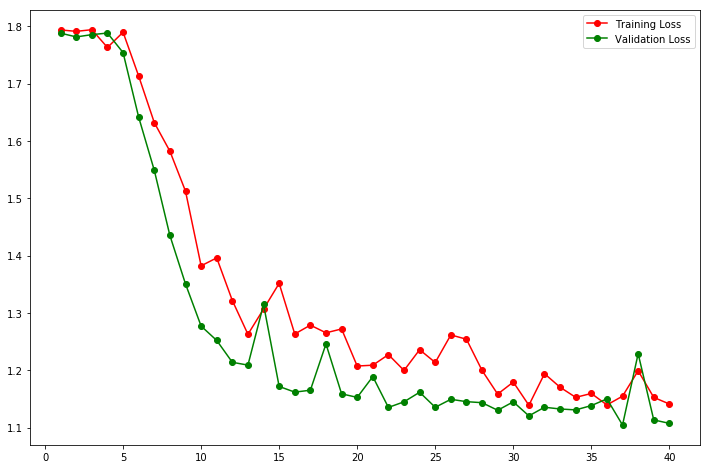

In [74]:
# Learning Curve
# Making the plot larger
plt.figure(figsize=(12, 8))

loss = history.history['loss']                          # Loss on the training data
val_loss = history.history['val_loss']                  # Loss on the validation data
epochs = range(1, 41)

plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'go-', label = 'Validation Loss')
plt.legend()

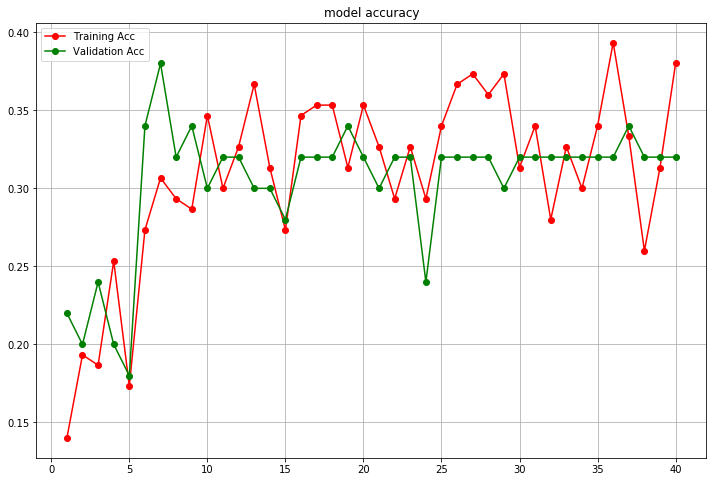

In [82]:
plt.figure(figsize=(12, 8))

loss = history.history['acc']                          # acc on the training data
val_loss = history.history['val_acc']                  # acc on the validation data
epochs = range(1, 41)

plt.title('model accuracy')
plt.plot(epochs, loss, 'ro-', label='Training Acc')
plt.plot(epochs, val_loss, 'go-', label = 'Validation Acc')
plt.grid()
plt.legend()
# plt.savefig('F://model_accuracy.png')
# plt.close()

In [ ]:
# plt.plot(history.history['acc'], marker='.')
# plt.plot(history.history['val_acc'], marker='.')
# plt.title('model accuracy')
# plt.xlabel('epoch')
# plt.ylabel('accuracy')
# plt.grid()
# plt.legend(['acc', 'val_acc'], loc='lower right')
# plt.savefig(os.path.join(result_dir, 'model_accuracy.png'))
# plt.close()

In [72]:
import itertools
def confusion_matrix_plot(cm, classes, 
                          title='Normalized Confusion Matrix', 
                          normalize=False, 
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

predict:  [1 1 1 1 3 1 3 1 2 3 3 1 1 1 1 1 1 3 1 3 1 1 1 1 3 1 3 1 1 3 3 1 3 1 3 1 3
 3 3 1 1 2 3 1 3 1 3 1 3 3 3 1 1 3 3 3 1 3 3 1 1 1 1 3 3 1 3 1 1 3 3 3 3 1
 3 3 3 1 3 3 1 3 3 3 3 3 3 3 3 1 1 1 3 1 3 1 1 1 3 3]
target:  [1 0 1 2 5 1 3 1 4 5 4 1 0 2 2 2 2 3 2 3 1 0 2 0 5 1 5 0 1 4 4 0 5 0 3 2 3
 3 3 0 2 5 3 1 4 0 3 0 4 4 3 0 2 5 5 5 0 3 4 2 1 1 0 4 5 1 5 2 0 4 5 5 4 0
 3 4 5 2 4 4 2 5 3 4 5 3 4 4 5 0 2 1 5 0 4 0 1 5 3 5]
[[ 0 18  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0 15  0  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  1 17  0  0]
 [ 0  1  1 18  0  0]]


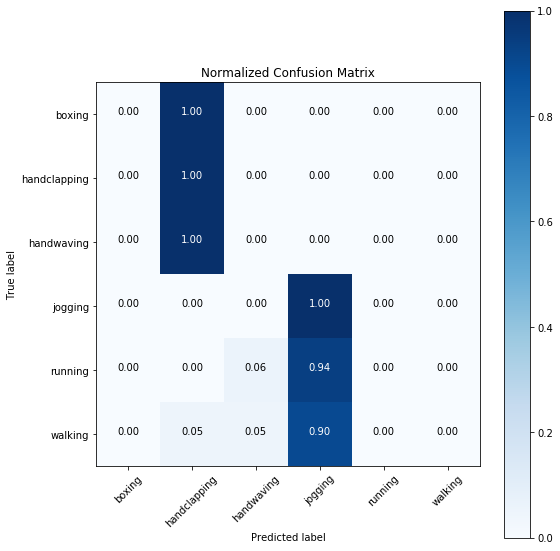

In [73]:
from sklearn.metrics import confusion_matrix

# Getting the predictions of our Model
predictions = model.predict_classes(X_test)
print("predict: ", predictions)
print("target: ", test_targets)
# Constructing the Confusion Matrix

model_cnf_matrix = confusion_matrix(test_targets, predictions)
print(model_cnf_matrix)

# PLotting the confusion matrix of our model
confusion_matrix_plot = confusion_matrix_plot(model_cnf_matrix, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


In [50]:
# # Imports
# import numpy as np
# np.random.seed(141)

# # Choosing 9 random persons (unique)
# people = np.arange(1, 26)
# chosen = np.random.choice(people, 2, replace=False)

# print('The following people are chosen:', chosen)

# # Selecting the paths of all the videos of these persons from our entire dataset
# bench_files = []
# indexes = []
# for index in chosen:
#     for i, path in enumerate(raw_data['filenames']):
#         if (('person' + str(index)) in path) or (('person0' + str(index)) in path):
#             bench_files.append(path)
#             indexes.append(i)
            
# bench_files = np.array(bench_files)
# bench_targets = raw_data['target'][indexes]
# print(indexes)
# print(len(bench_targets))

The following people are chosen: [11 21]
[70, 71, 72, 120, 121, 122, 123, 151, 152, 153, 154, 264, 265, 266, 191, 192, 193, 194, 244, 245, 246, 247, 297, 298]
24


In [51]:
# import itertools
# def confusion_matrix_plot(cm, classes, 
#                           title='Normalized Confusion Matrix', 
#                           normalize=False, 
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         cm = np.around(cm, decimals=2)
#         cm[np.isnan(cm)] = 0.0
#     plt.subplots(1, 1, figsize=(8, 8))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     fmt = '.2f'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

In [55]:
# # Imports
# import numpy as np
# from keras.utils import to_categorical
# from utils import Videos

# # An object of the class `Videos` to load the data in the required format
# reader = Videos(target_size=(128, 128), 
#                 to_gray=True, 
#                 max_frames=50, 
#                 extract_frames='first', 
#                 required_fps=5, 
#                 normalize_pixels=(-1, 1))

In [56]:
# bench_video = reader.read_videos(bench_files)
# bench_target = to_categorical(bench_targets, num_classes=6)
# print('Shape of training data:', bench_video.shape)
# print('Shape of training labels:', bench_target.shape)

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:10<00:00,  2.16it/s]


Shape of training data: (24, 50, 128, 128, 1)
Shape of training labels: (24, 6)


In [57]:
# # Loading the model that performed the best on the validation set
# model.load_weights('E://Model_Weights//Model_weights.best.hdf5')

# # Testing the model on the Test data
# (loss, accuracy) = model.evaluate(bench_video, bench_target, batch_size=8, verbose=0)

# print('Accuracy on test data: {:.2f}%'.format(accuracy * 100))

Accuracy on test data: 16.67%


In [67]:
# # Imports
# from sklearn.metrics import confusion_matrix

# # Getting the predictions of our Model
# predictions = model.predict_classes(bench_video)

# # Constructing the Confusion Matrix
# model_cnf_matrix = confusion_matrix(bench_targets, predictions)

# # PLotting the confusion matrix of our model
# confusion_matrix_plot = confusion_matrix_plot(model_cnf_matrix, 
#                                               classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
#                                               normalize=True)

[[0 3 0 0 0]
 [0 4 0 0 0]
 [0 8 0 0 0]
 [0 4 0 0 0]
 [0 5 0 0 0]]


TypeError: 'NoneType' object is not callable

model_cnf_matrix:  [[ 0  0 18  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0 15  0  0  0]
 [ 0  0 15  0  0  0]
 [ 0  0 18  0  0  0]
 [ 0  0 20  0  0  0]]
